In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.altimetry
reload(asp_plot.altimetry)

from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_defaults_all"),
        parms=None,
    )

icesat.atl06sr

x_atc  segment_id  w_surface_window_final  \
time                                                                            
2018-11-20 23:50:33.174154752   7950365.0      396664               55.280636   
2018-11-20 23:50:33.176964608   7950385.0      396665              165.354034   
2018-11-20 23:50:33.205090304   7950585.0      396675               30.000000   
2018-11-20 23:50:33.207909376   7950605.0      396676               30.000000   
2018-11-20 23:50:33.210734336   7950625.0      396677               72.097977   
...                                   ...         ...                     ...   
2024-04-12 14:33:11.094880512  12121075.0      605115               99.724335   
2024-04-12 14:33:11.097697792  12121096.0      605116               89.090462   
2024-04-12 14:33:11.100488448  12121116.0      605117               30.000000   
2024-04-12 14:33:11.103292672  12121136.0      605118               43.291271   
2024-04-12 14:33:11.106092288  12121156.0      605119               92.979218   

                               pflags  region  cycle  gt  n_fit_photons  rgt  \
time                                                                           
2018-11-20 23:50:33.174154752       2       3      1  30             13  815   
2018-11-20 23:50:33.176964608       2       3      1  30             10  815   
2018-11-20 23:50:33.205090304       2       3      1  30             12  815   
2018-11-20 23:50:33.207909376       2       3      1  30             12  815   
2018-11-20 23:50:33.210734336       2       3      1  30             10  815   
...                               ...     ...    ...  ..            ...  ...   
2024-04-12 14:33:11.094880512       2       5     23  60             26  381   
2024-04-12 14:33:11.097697792       2       5     23  60             29  381   
2024-04-12 14:33:11.100488448       2       5     23  60             39  381   
2024-04-12 14:33:11.103292672       2       5     23  60             40  381   
2024-04-12 14:33:11.106092288       2       5     23  60             29  381   

                               h_sigma  rms_misfit     h_mean  dh_fit_dx  \
time                                                                       
2018-11-20 23:50:33.174154752      0.0         0.0  17.163371   2.167735   
2018-11-20 23:50:33.176964608      0.0         0.0  87.613537   6.484427   
2018-11-20 23:50:33.205090304      0.0         0.0  37.413855   0.466165   
2018-11-20 23:50:33.207909376      0.0         0.0  60.672770   0.476847   
2018-11-20 23:50:33.210734336      0.0         0.0  28.112882  -2.827270   
...                                ...         ...        ...        ...   
2024-04-12 14:33:11.094880512      0.0         0.0   6.809139  -3.910685   
2024-04-12 14:33:11.097697792      0.0         0.0 -31.145281   0.387910   
2024-04-12 14:33:11.100488448      0.0         0.0   5.543802   0.755145   
2024-04-12 14:33:11.103292672      0.0         0.0  11.852527  -1.697528   
2024-04-12 14:33:11.106092288      0.0         0.0  36.513437   3.646165   

                               spot        y_atc                     geometry  \
time                                                                            
2018-11-20 23:50:33.174154752     4 -1144.029419  POINT (-156.77649 71.26717)   
2018-11-20 23:50:33.176964608     4 -1143.732056  POINT (-156.77657 71.26735)   
2018-11-20 23:50:33.205090304     4 -1144.028320  POINT (-156.77728 71.26913)   
2018-11-20 23:50:33.207909376     4 -1143.878174   POINT (-156.77736 71.2693)   
2018-11-20 23:50:33.210734336     4 -1143.994751  POINT (-156.77743 71.26948)   
...                             ...          ...                          ...   
2024-04-12 14:33:11.094880512     1 -3294.791260   POINT (-156.7966 71.26757)   
2024-04-12 14:33:11.097697792     1 -3295.052734  POINT (-156.79668 71.26739)   
2024-04-12 14:33:11.100488448     1 -3294.865967  POINT (-156.79674 71.26721)   
2024-04-12 14:33:11.103292672     1 -3294.869385  POINT (-156

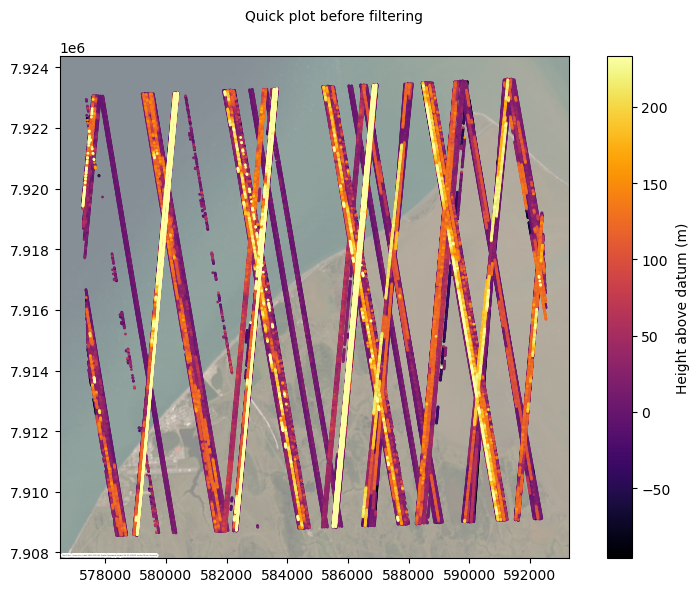

In [10]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

In [11]:
# Filter data down
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_defaults_filtered"),
    )

icesat.atl06sr_filtered

x_atc  segment_id  w_surface_window_final  \
time                                                                            
2022-04-17 01:15:56.210853376  12110909.0      604607                4.797086   
2022-04-17 01:15:56.467529728  12112730.0      604698               17.493622   
2022-04-17 01:15:56.470366720  12112750.0      604699                8.197321   
2022-04-17 01:15:56.473206272  12112770.0      604700                5.334358   
2022-04-17 01:15:56.478862080  12112810.0      604702               13.786940   
...                                   ...         ...                     ...   
2022-04-17 01:15:57.948431872  12121015.0      605112               30.273314   
2022-04-17 01:15:57.954062336  12121055.0      605114               27.024799   
2022-04-17 01:15:57.959682048  12121096.0      605116               20.123384   
2022-04-17 01:15:57.962489600  12121116.0      605117               13.761951   
2022-04-17 01:15:57.968112384  12121156.0      605119               15.064380   

                               pflags  region  cycle  gt  n_fit_photons  rgt  \
time                                                                           
2022-04-17 01:15:56.210853376       4       5     15  10            295  381   
2022-04-17 01:15:56.467529728       0       5     15  10            172  381   
2022-04-17 01:15:56.470366720       4       5     15  10            209  381   
2022-04-17 01:15:56.473206272       4       5     15  10             12  381   
2022-04-17 01:15:56.478862080       0       5     15  10            139  381   
...                               ...     ...    ...  ..            ...  ...   
2022-04-17 01:15:57.948431872       0       5     15  60             72  381   
2022-04-17 01:15:57.954062336       0       5     15  60             27  381   
2022-04-17 01:15:57.959682048       0       5     15  60             18  381   
2022-04-17 01:15:57.962489600       4       5     15  60             29  381   
2022-04-17 01:15:57.968112384       0       5     15  60             34  381   

                                h_sigma  rms_misfit     h_mean  dh_fit_dx  \
time                                                                        
2022-04-17 01:15:56.210853376  0.063010    0.768987   1.579141  -0.124473   
2022-04-17 01:15:56.467529728  0.361169    3.029019   7.360164  -0.550595   
2022-04-17 01:15:56.470366720  0.154096    1.263511   1.262775   0.126525   
2022-04-17 01:15:56.473206272  0.580667    1.987427  14.452252  -0.207811   
2022-04-17 01:15:56.478862080  0.336616    2.428385   8.354430   0.540132   
...                                 ...         ...        ...        ...   
2022-04-17 01:15:57.948431872  0.736336    6.094207  32.296021   1.186947   
2022-04-17 01:15:57.954062336  0.514837    2.627630  28.592796   0.332882   
2022-04-17 01:15:57.959682048  0.383337    1.621593  26.792586   0.318711   
2022-04-17 01:15:57.962489600  0.746452    3.839091  33.942864   0.539151   
2022-04-17 01:15:57.968112384  0.641039    3.707037  36.047966   0.590273   

                               spot        y_atc                     geometry  \
time                                                                            
2022-04-17 01:15:56.210853376     1  3311.709229  POINT (-156.57677 71.35026)   
2022-04-17 01:15:56.467529728     1  3309.845215   POINT (-156.5835 71.33408)   
2022-04-17 01:15:56.470366720     1  3309.833984   POINT (-156.58357 71.3339)   
2022-04-17 01:15:56.473206272     1  3309.765381  POINT (-156.58365 71.33372)   
2022-04-17 01:15:56.478862080     1  3309.667480   POINT (-156.5838 71.33337)   
...                             ...          ...                          ...   
2022-04-17 01:15:57.948431872     6 -3314.016846  POINT (-156.79692 71.26812)   
2022-04-17 01:15:57.954062336     6 -3313.941162  POINT (-156.79706 71.26777)   
2022-04-17 01:15:57.959682048     6 -3313.871826   POINT (-156.7972 71.26741)   
2022-04-17 01:15:57.962489600     6 -3313.762695

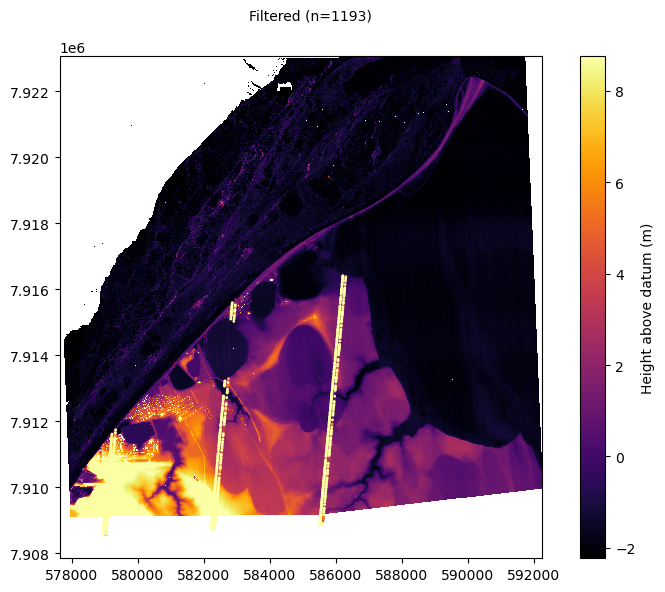

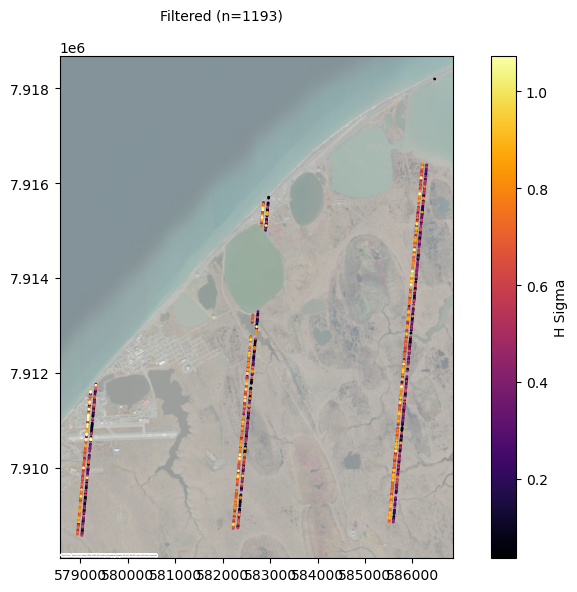

In [13]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    plot_dem=True,
    **ctx_kwargs
)

icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

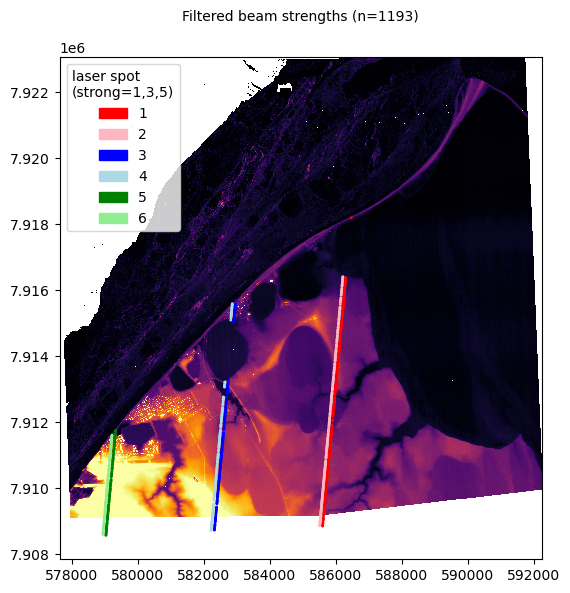

In [17]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



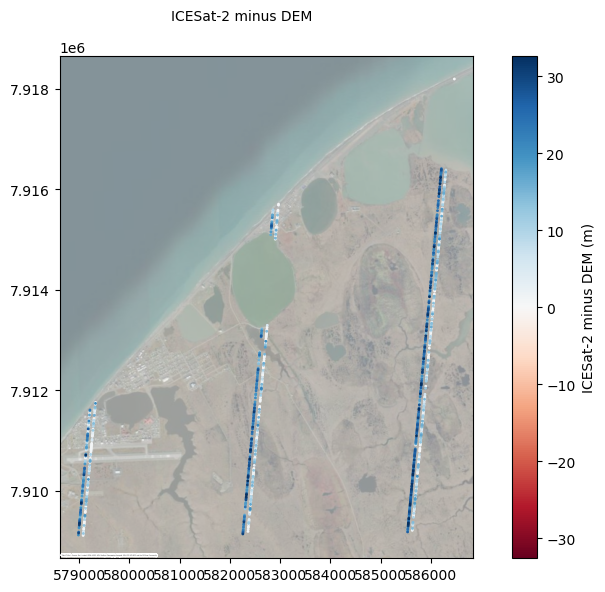

In [18]:
icesat.compare_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [51]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

--> Setting number of processing threads to: 4

Creating output directory: "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align".
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align-log-pc_align-08-01-2248-4476.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 13.137 [s]
Reference points box: Origin: (-156.826, 71.2694) width: 0.401829 height: 0.124855
Source points box:    Origin: (-156.798, 71.2663) width: 0.22219 height: 0.0842259
Intersection reference box:  Origin: (-156.798, 71.2694) width: 0.22219 height: 0.0811688
Intersection source    box:  Origin: (-156.798, 71.2694) 

In [55]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-log-point2dem-08-01-2254-17865.txt
The point cloud files must have an equal number of channels which must be 4 or 6 to be able to remove outliers.

Point cloud extent estimation: [..........................................] 0%
Point cloud extent estimation: [..........................................] 1%
Point cloud extent estimation: [..........................................] 2%
Point cloud extent estimation: [*.........................................] 3%
Point cloud extent estimation: [*.........................................] 4%
Point cloud extent estimation: [**........................................] 5%
Point cloud extent estimation: [**........

In [58]:
icesat.aligned_dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Using aligned DEM for comparison.


Using aligned DEM for comparison.



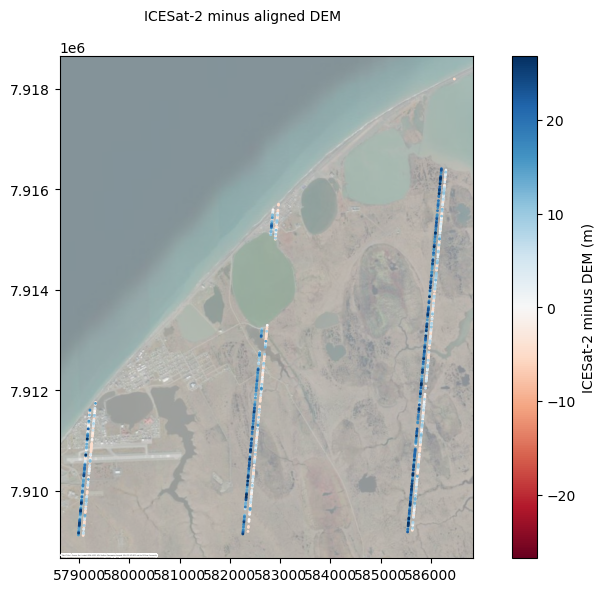

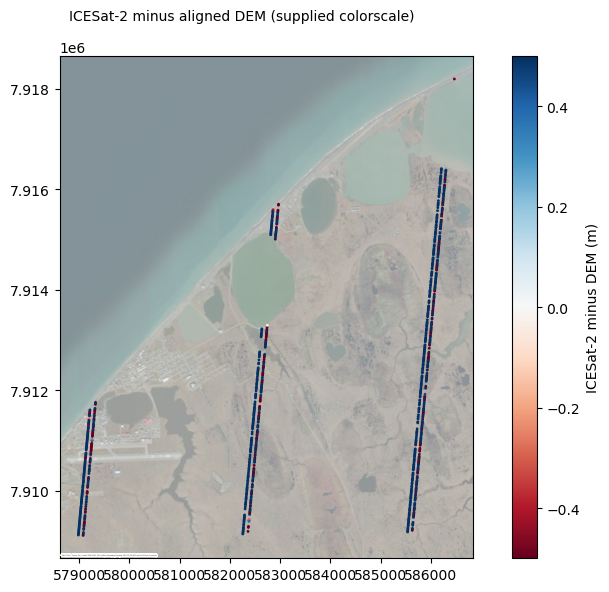

In [59]:
# Quickly compare the translated DEM to the ATL06 data
icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM", use_aligned_dem=True, **ctx_kwargs)

icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM (supplied colorscale)", clim=(-0.5, 0.5), use_aligned_dem=True, **ctx_kwargs)

In [61]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_parquet=False,
    filename=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

n_fit_photons  spot       x_atc        y_atc  \
time                                                                    
2019-04-18 16:42:25.758            736     3   7951087.5  4860.481445   
2019-04-18 16:42:25.761            750     3   7951107.5  4860.437012   
2019-04-18 16:42:25.764            733     3   7951127.5  4860.357910   
2019-04-18 16:42:25.767            730     3   7951147.5  4860.274414   
2019-04-18 16:42:25.769            760     3   7951167.5  4860.208496   
...                                ...   ...         ...          ...   
2024-04-12 14:33:08.668             71     4  12106206.0    52.733665   
2024-04-12 14:33:09.709             71     3  12111129.0   -34.619816   
2024-04-12 14:33:10.657             10     2  12120435.0 -3207.792725   
2024-04-12 14:33:10.820             69     5  12118894.0  3225.696289   
2024-04-12 14:33:10.986             19     5  12120075.0  3226.351807   

                         w_surface_window_final  dh_fit_dx  pflags  cycle  \
time                                                                        
2019-04-18 16:42:25.758            5.799953e+20  -0.209321       0      3   
2019-04-18 16:42:25.761            1.031103e+21   0.211128       0      3   
2019-04-18 16:42:25.764            5.799953e+20  -0.316492       0      3   
2019-04-18 16:42:25.767            1.031103e+21   0.030006       0      3   
2019-04-18 16:42:25.769            1.031103e+21  -0.210451       0      3   
...                                         ...        ...     ...    ...   
2024-04-12 14:33:08.668            1.031103e+21  -1.398296       0     23   
2024-04-12 14:33:09.709            1.031103e+21   0.192848       0     23   
2024-04-12 14:33:10.657            5.091055e+01  -1.996348       0     23   
2024-04-12 14:33:10.820            1.031103e+21  -0.965957       0     23   
2024-04-12 14:33:10.986            1.265625e+01   0.003556       0     23   

                         rms_misfit  segment_id   h_sigma  rgt  gt  region  \
time                                                                         
2019-04-18 16:42:25.758   86.361397      396696  3.190147  312  30       3   
2019-04-18 16:42:25.761   84.909294      396697  3.105118  312  30       3   
2019-04-18 16:42:25.764   79.875534      396698  2.950737  312  30       3   
2019-04-18 16:42:25.767   79.317123      396699  2.936219  312  30       3   
2019-04-18 16:42:25.769   84.042885      396700  3.049138  312  30       3   
...                             ...         ...       ...  ...  ..     ...   
2024-04-12 14:33:08.668   51.961163      604372  7.032969  381  30       5   
2024-04-12 14:33:09.709   62.546719      604618  7.448154  381  40       5   
2024-04-12 14:33:10.657   10.070227      605083  3.213951  381  50       5   
2024-04-12 14:33:10.820   60.164772      605006  7.245250  381  20       5   
2024-04-12 14:33:10.986    0.199547      605065  0.052944  381  20       5   

                            h_mean  esa_worldcover.file_id  \
time                                                         
2019-04-18 16:42:25.758  -1.992327            184683593728   
2019-04-18 16:42:25.761  -2.542358            184683593728   
2019-04-18 16:42:25.764  -0.940236            184683593728   
2019-04-18 16:42:25.767   0.417156            184683593728   
2019-04-18 16:42:25.769   0.106438            184683593728   
...                            ...                     ...   
2024-04-12 14:33:08.668  -1.576862            227633266688   
2024-04-12 14:33:09.709   1.662242            227633266688   
2024-04-12 14:33:10.657 -25.488793            227633266688   
2024-04-12 14:33:10.820  11.803825            227633266688   
2024-04-12 14:33:10.986   3.312368            227633266688   

                         esa_worldcover.flags  esa_worldcover.value  \
time                                                                  
2019-04-18 16:42:25.758                     0                  80.0   
2019-04-18 16:42:25.761               


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



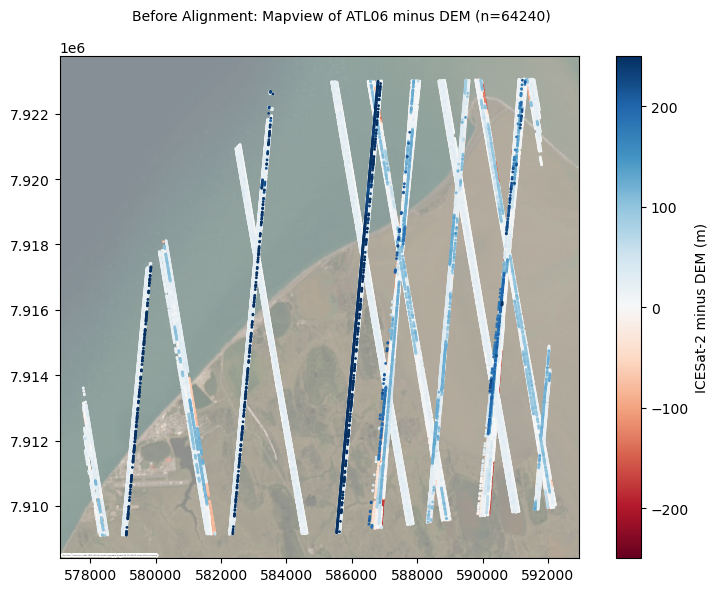

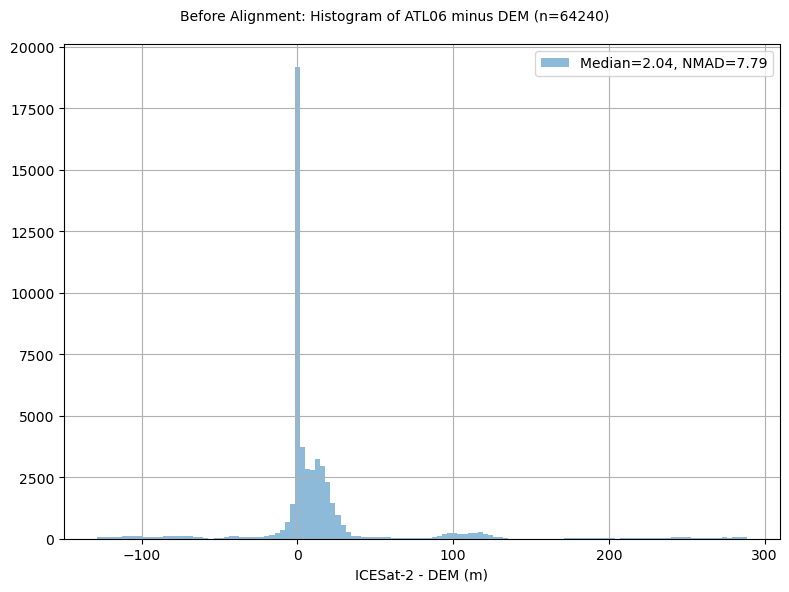

In [62]:
# Validate (before)
icesat.compare_atl06sr_to_dem(title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", **ctx_kwargs)
icesat.histogram(title=f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



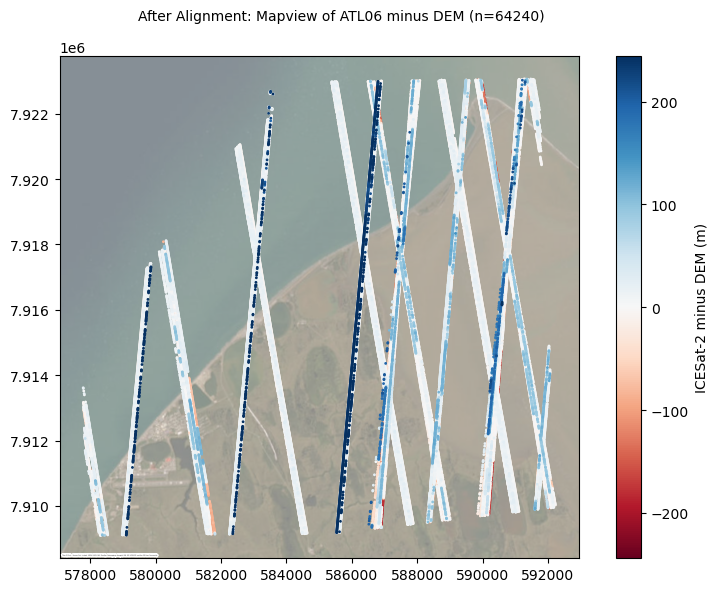

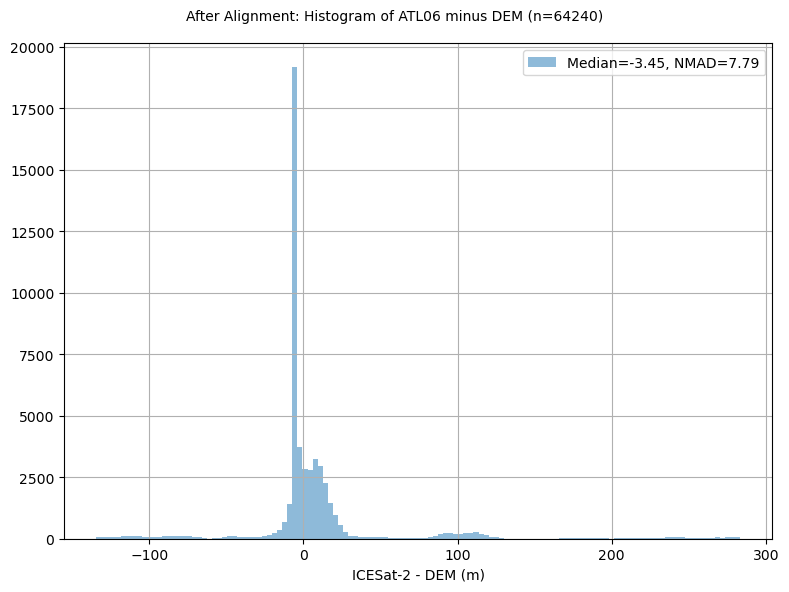

In [63]:
# Validate (after)
icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)
icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



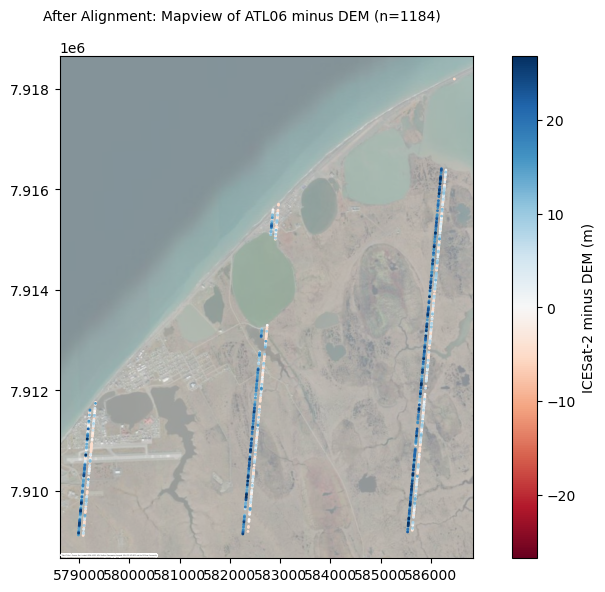

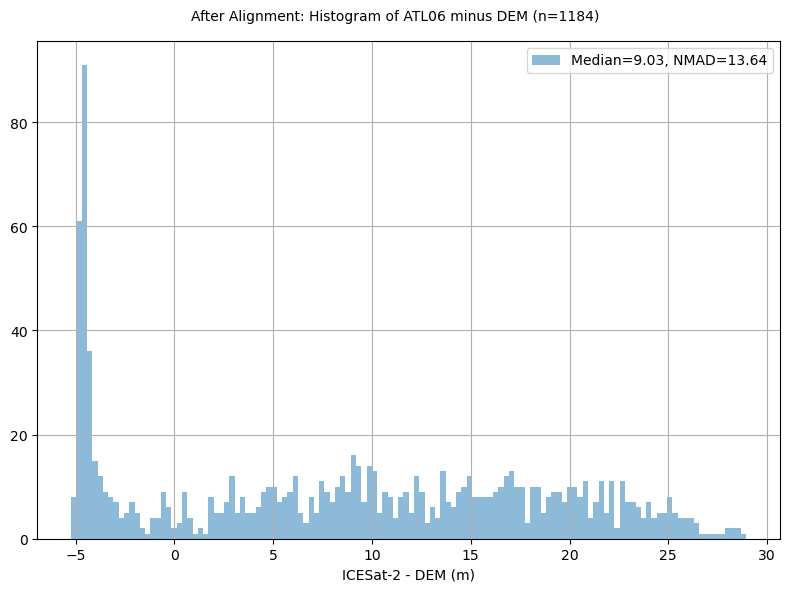

In [64]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
)

icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)

icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")

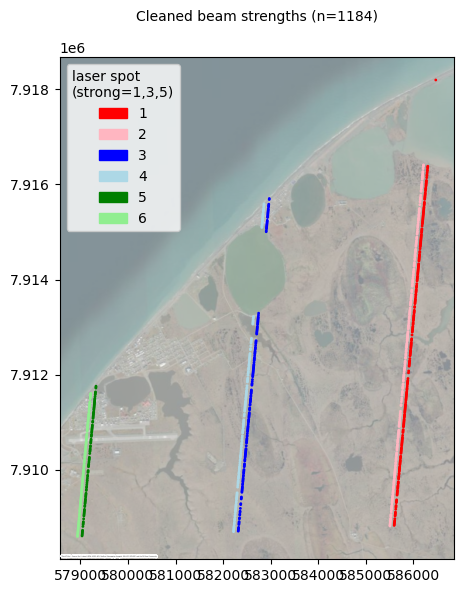

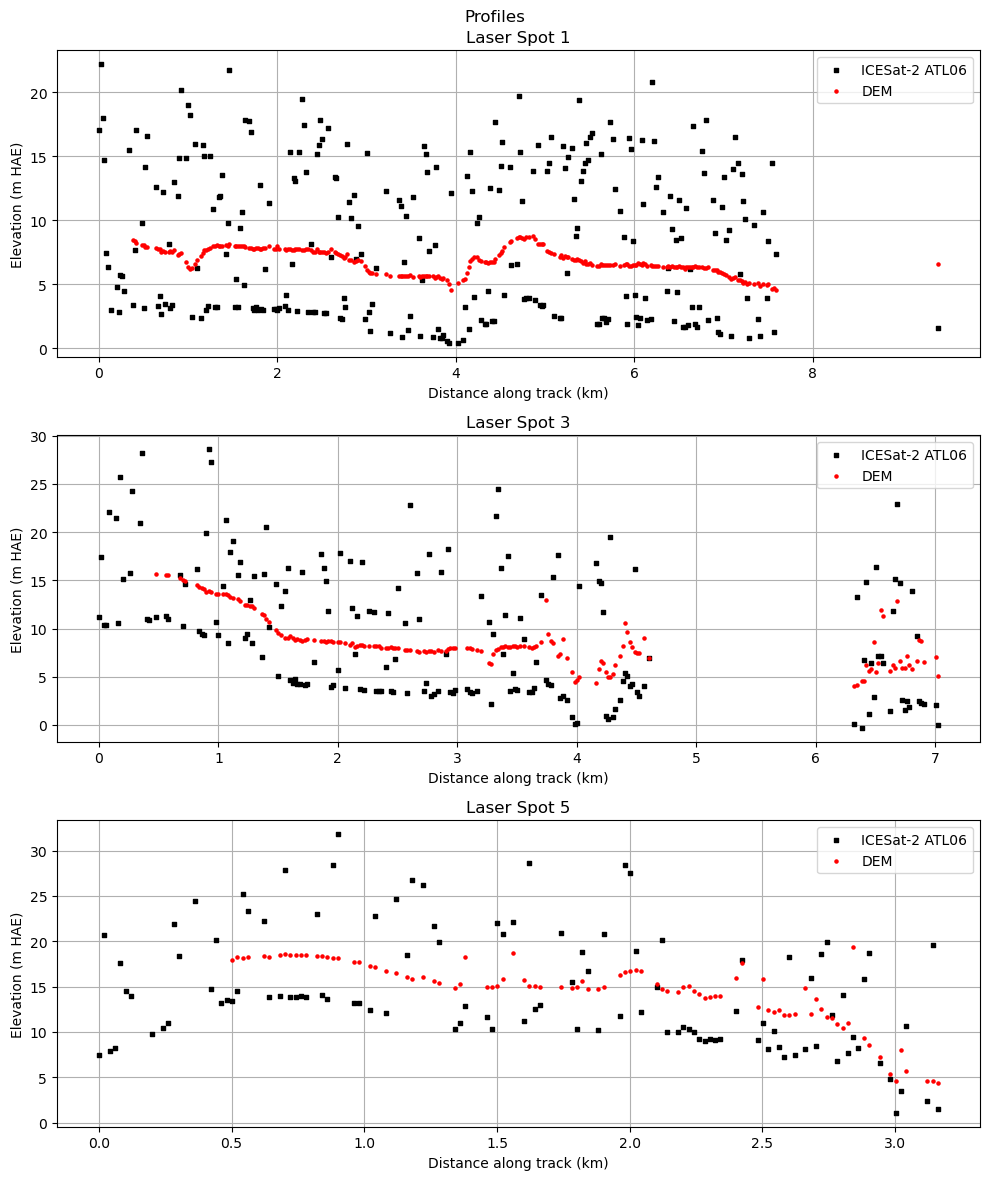

In [65]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)